Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - no GM1

name = '_DPPC_DIPC_chol_352'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/5_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

In [2]:
# name and files for the simulation studied LPT - 10% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/10_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [3]:
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all and (name PO4 or name GM5)")

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [80]:
# TAKE THE LAST FRAME
frame = 8200
u.trajectory[frame]

< Timestep 8200 with unit cell dimensions [431.53134 431.53134 190.54466  90.       90.       90.     ] >

In [81]:
# set the x and y min and max values

sel_all = "all and (name PO4 or name GM5)"
patch = u.select_atoms(sel_all).positions
print(patch)

xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[288.78003  261.23      88.64    ]
 [ 31.890001  93.33      53.33    ]
 [346.69003   54.510002  58.13    ]
 ...
 [264.1      287.87      48.9     ]
 [381.60004  199.69002   25.77    ]
 [263.35     228.98001   35.620003]]
431.52002
431.27002
0.26
0.07


In [82]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5272
number of lipids in the upper leaflet: 2676 + number of lipids in the lower leaflet:2596 
= 5272


In [83]:
# TAKE THE LAST FRAME

u.trajectory[frame]

< Timestep 8200 with unit cell dimensions [431.53134 431.53134 190.54466  90.       90.       90.     ] >

In [84]:
sel_Lo = "all and (name PO4 and resname DPPC)"
M_Lo = leaflet1.select_atoms(sel_Lo).positions
for i in range(len(M_Lo)):
    M_Lo[i,2] = 1

sel_Ld = "all and (name PO4 and resname DIPC)"
M_Ld = leaflet1.select_atoms(sel_Ld).positions
for i in range(len(M_Ld)):
    M_Ld[i,2] = 0
    
M_coords = np.concatenate((M_Lo, M_Ld), axis = 0)
print(M_coords)

[[309.21002 258.02002   1.     ]
 [146.18001  67.94      1.     ]
 [199.48001 180.61002   1.     ]
 ...
 [293.52002 177.97      0.     ]
 [420.68     82.38      0.     ]
 [375.74002 345.18002   0.     ]]


In [85]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N
print(dx)
print(dy)

28.750667317708334
28.74666748046875


(225, 3)


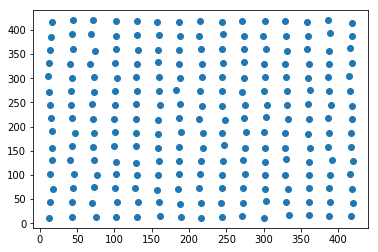

In [86]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        if  n_tot1PC!=0:
            phi1_Lo=n_Lo1/n_tot1PC
        else :
            print('leaflet 1, empty box: i=%d and j=%d' % (i,j))
        
        Mphi1_Lo[i,j]=phi1_Lo
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))

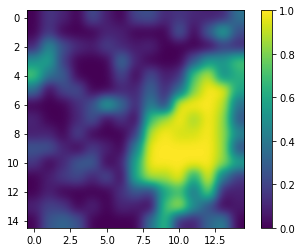

In [87]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()

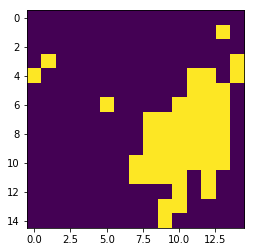

In [88]:
# lower leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi1_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_Lo[i,j]>= threshold :
            Mphi1_bin[i,j]=1

#print(Mphi1_bin)          

plt.imshow(Mphi1_bin)

In [89]:
print(Mphi1_bin)
print(np.shape(Mphi1_bin))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(15, 15)


In [90]:
M_sum = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        M_sum[i,j] = sum(Mphi1_bin[i,:])+sum(Mphi1_bin[:,j])
print(M_sum)

[[ 1.  1.  0.  0.  0.  1.  0.  2.  5.  7.  8.  7.  9.  7.  2.]
 [ 2.  2.  1.  1.  1.  2.  1.  3.  6.  8.  9.  8. 10.  8.  3.]
 [ 1.  1.  0.  0.  0.  1.  0.  2.  5.  7.  8.  7.  9.  7.  2.]
 [ 3.  3.  2.  2.  2.  3.  2.  4.  7.  9. 10.  9. 11.  9.  4.]
 [ 5.  5.  4.  4.  4.  5.  4.  6.  9. 11. 12. 11. 13. 11.  6.]
 [ 4.  4.  3.  3.  3.  4.  3.  5.  8. 10. 11. 10. 12. 10.  5.]
 [ 6.  6.  5.  5.  5.  6.  5.  7. 10. 12. 13. 12. 14. 12.  7.]
 [ 7.  7.  6.  6.  6.  7.  6.  8. 11. 13. 14. 13. 15. 13.  8.]
 [ 7.  7.  6.  6.  6.  7.  6.  8. 11. 13. 14. 13. 15. 13.  8.]
 [ 7.  7.  6.  6.  6.  7.  6.  8. 11. 13. 14. 13. 15. 13.  8.]
 [ 8.  8.  7.  7.  7.  8.  7.  9. 12. 14. 15. 14. 16. 14.  9.]
 [ 6.  6.  5.  5.  5.  6.  5.  7. 10. 12. 13. 12. 14. 12.  7.]
 [ 3.  3.  2.  2.  2.  3.  2.  4.  7.  9. 10.  9. 11.  9.  4.]
 [ 3.  3.  2.  2.  2.  3.  2.  4.  7.  9. 10.  9. 11.  9.  4.]
 [ 2.  2.  1.  1.  1.  2.  1.  3.  6.  8.  9.  8. 10.  8.  3.]]


In [91]:
val_max = 0
x_big = 0
y_big = 0
for i in range(N):
    for j in range(N):
        if M_sum[i,j]>val_max:
            val_max = M_sum[i,j]
            x_big = i
            y_big = j
print(x_big)
print(y_big)
print(val_max)

10
12
16.0


In [92]:
def modulo(x,a,b):
    if x < a:
        x = x + (b-a)
    elif x >= b:
        x = x - (b-a)
    return x

In [93]:
x_center_b = 7
y_center_b = 7

vec_cor_b = np.zeros((1,2))

3
5
[[3. 5.]]


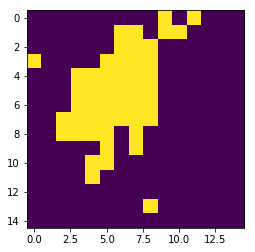

In [94]:
x_cor = x_big - x_center_b
y_cor = y_big - y_center_b
print(x_cor)
print(y_cor)
M_full = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_bin[i,j]==1:
            M_full[ modulo(i-x_cor,0,N), modulo(j-y_cor,0,N) ] = Mphi1_bin[i,j]
            
plt.imshow(M_full)

vec_cor_b[0,0] = vec_cor_b[0,0] + x_cor
vec_cor_b[0,1] = vec_cor_b[0,1] + y_cor
print(vec_cor_b)

In [95]:
# for M_full

nb_Lo = int(np.sum(M_full))
print(nb_Lo)

coords_Lo = np.zeros((nb_Lo,2))
l = 0

for i in range(N):
    for j in range(N):
        if M_full[i,j] == 1 :
            coords_Lo[l][0] = i
            coords_Lo[l][1] = j
            l += 1

box_x_mean = np.mean(coords_Lo[:,0])
box_y_mean = np.mean(coords_Lo[:,1])
print(box_x_mean)
print(box_y_mean)

box_x_max = 0
box_y_max = 0

for i in range(N):
    for j in range(N):
        if M_full[i,j]==1 and np.abs(i-box_x_mean) > box_x_max:
            box_x_max = np.abs(i-box_x_mean)
        if M_full[i,j]==1 and np.abs(j-box_y_mean) > box_y_max:
            box_y_max = np.abs(j-box_y_mean)
print(box_x_max)
print(box_y_max)
box_max = np.ceil(max(box_x_max,box_y_max))
print(box_max)

50
5.32
5.74
7.68
5.74
8.0


(-0.5598566308243728, 11.55985663082437, -13.6651766004415, 0.6651766004415012)

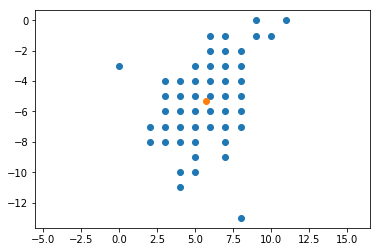

In [96]:
plt.scatter(coords_Lo[:,1], -coords_Lo[:,0])
plt.scatter(box_y_mean, -box_x_mean)
plt.axis('equal')

In [97]:
x_mean_b = int(round(box_x_mean))
print(x_mean_b)
y_mean_b = int(round(box_y_mean))
print(y_mean_b)

5
6


-2
-1
[[1. 4.]]


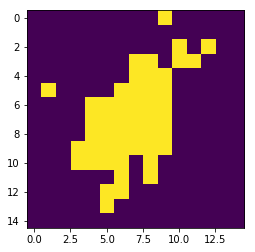

In [98]:
x_cor = x_mean_b - x_center_b
y_cor = y_mean_b - y_center_b
print(x_cor)
print(y_cor)
M_center = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if M_full[i,j]==1:
            M_center[ modulo(i-x_cor,0,N), modulo(j-y_cor,0,N) ] = M_full[i,j]
            
plt.imshow(M_center)

vec_cor_b[0,0] = vec_cor_b[0,0] + x_cor
vec_cor_b[0,1] = vec_cor_b[0,1] + y_cor
print(vec_cor_b)

In [99]:
x_center = x_center_b /N * (xmax-xmin)
y_center = y_center_b /N * (ymax-ymin)
r_max = box_max /N * (ymax-ymin) *1.1

vec_cor = vec_cor_b /N * (ymax-ymin)

print(x_center)
print(y_center)
print(r_max)
print(vec_cor)

201.25467122395833
201.22667236328127
252.970673828125
[[ 28.74666748 114.98666992]]


In [100]:
for i in range(len(M_coords)):
    print(M_coords[i]) 

[309.21002 258.02002   1.     ]
[146.18001  67.94      1.     ]
[199.48001 180.61002   1.     ]
[206.94 289.99   1.  ]
[239.09 263.91   1.  ]
[330.32 237.41   1.  ]
[138.14001 323.28003   1.     ]
[106.21001 383.83002   1.     ]
[413.67 290.68   1.  ]
[120.80001  39.82      1.     ]
[230.58    311.21002   1.     ]
[309.90002 341.62003   1.     ]
[227.26001 190.28001   1.     ]
[342.43    347.61002   1.     ]
[188.36    360.41998   1.     ]
[375.52002 365.09003   1.     ]
[409.66003 270.51      1.     ]
[240.3  280.92   1.  ]
[284.83002 249.29001   1.     ]
[281.54 387.89   1.  ]
[283.45 303.64   1.  ]
[422.11002 102.90001   1.     ]
[355.65002 355.81      1.     ]
[379.08002 263.24002   1.     ]
[190.84001 184.91      1.     ]
[202.24 379.01   1.  ]
[301.97    304.71002   1.     ]
[37.270004 38.21      1.      ]
[322.35 277.18   1.  ]
[369.67004 361.42      1.     ]
[330.61002 334.21002   1.     ]
[276.96002 298.44      1.     ]
[287.25003 222.32      1.     ]
[172.      389.25003   1.

[219.84001 237.86002   1.     ]
[265.36002   74.840004   1.      ]
[318.76 304.67   1.  ]
[342.39    234.25002   1.     ]
[315.99002 257.05002   1.     ]
[209.08002 299.48      1.     ]
[174.77002 321.35004   1.     ]
[148.88    232.99002   1.     ]
[249.34003 326.5       1.     ]
[223.15001 251.28      1.     ]
[375.39    430.33002   1.     ]
[344.13 293.51   1.  ]
[398.25 290.63   1.  ]
[232.96002 389.36002   1.     ]
[346.61005 220.89001   1.     ]
[222.8  293.14   1.  ]
[162.77      20.370003   1.      ]
[215.29001 293.78003   1.     ]
[277.69 307.85   1.  ]
[424.39     87.97001   1.     ]
[195.17    357.81003   1.     ]
[377.88 286.26   1.  ]
[306.73    221.04002   1.     ]
[251.43002 253.5       1.     ]
[220.91002 301.30002   1.     ]
[265.39 282.14   1.  ]
[ 83.020004 415.64       1.      ]
[224.23001 232.41      1.     ]
[159.77002 403.30002   1.     ]
[141.08    388.89005   1.     ]
[ 38.57 415.54   1.  ]
[193.68    306.59003   1.     ]
[205.77002 424.09      1.     ]
[166.84

[191.90001 104.89      0.     ]
[ 13.610001 340.35       0.      ]
[358.03003 256.29      0.     ]
[ 76.310005 419.41003    0.      ]
[426.75003 318.51      0.     ]
[376.93  69.32   0.  ]
[ 25.670002 144.45001    0.      ]
[135.55      59.780003   0.      ]
[390.79004 159.29001   0.     ]
[188.25      36.460003   0.      ]
[373.22003  96.72001   0.     ]
[180.66    426.88004   0.     ]
[225.58  38.27   0.  ]
[252.98001 133.78      0.     ]
[ 63.360004 168.39001    0.      ]
[317.04004 195.42001   0.     ]
[  1.9100001 290.79        0.       ]
[53.750004   1.5600001  0.       ]
[260.87003    8.160001   0.      ]
[379.80005 417.99005   0.     ]
[348.37003   73.630005   0.      ]
[ 9.8      50.070004  0.      ]
[371.5     178.83002   0.     ]
[310.10004 195.50002   0.     ]
[146.76001 325.87003   0.     ]
[ 15.990001 304.97003    0.      ]
[181.96        3.9400003   0.       ]
[121.90001 277.23      0.     ]
[ 60.070004 189.82       0.      ]
[369.11005   23.660002   0.      ]
[429.95  6

In [101]:
for i in range(len(M_coords)):
    M_coords[i,0] = modulo(M_coords[i,0] - vec_cor[0,0],xmin,xmax)
    M_coords[i,1] = modulo(M_coords[i,1] - vec_cor[0,1],ymin,ymax)

In [102]:
print(M_coords)

[[280.46335  143.03336    1.      ]
 [117.43334  384.15335    1.      ]
 [170.73334   65.623344   1.      ]
 ...
 [264.77335   62.98333    0.      ]
 [391.93332  398.59335    0.      ]
 [346.99335  230.19336    0.      ]]


In [103]:
nb_r = 6
dr = int(r_max/nb_r)

nb_theta = 12
dtheta = 2*np.pi/nb_theta

print(dr)
print(dtheta)

42
0.5235987755982988


In [104]:
# Condition à voir

if r_max < np.floor((xmax-xmin)/2)+dr:
    print('OK')
else:
    print('too big')

OK


In [105]:
# leaflet 1
# divide the leaflet into a pie

x = M_coords[:,0]
y = M_coords[:,1]

x_pie_r = [[] for r in range(nb_r)]
y_pie_r = [[] for r in range(nb_r)]
pie_r = [[] for r in range(nb_r)]

x_pie_theta = [[] for t in range(nb_theta)]
y_pie_theta = [[] for t in range(nb_theta)]
pie_theta = [[] for t in range(nb_theta)]

r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M_coords)):
        xi = M_coords[i,0]
        yi = M_coords[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)
        
    x_pie_r[r] = x_r
    y_pie_r[r] = y_r
    pie_r[r] = i_r
    
for i in range(len(M_coords)):
    xi = M_coords[i,0]
    yi = M_coords[i,1]
    
    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1
    
    x_pie_theta[t].append(xi)
    y_pie_theta[t].append(yi)
    pie_theta[t].append(i)

(-25.420074550448362,
 457.6684990388609,
 -28.788861790160116,
 460.0555564327634)

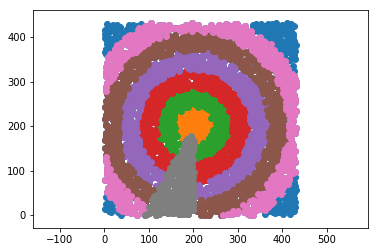

In [106]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r[r], y_pie_r[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=8;    
plt.scatter(x_pie_theta[t], y_pie_theta[t])    
plt.axis('equal')

In [107]:
# leaflet 1
# divide the leaflet into a pie - Lo lipids only

l_Lo = int(np.sum(M_coords[:,2]))
M_coords_Lo = np.zeros((l_Lo,3))

j = 0
for i in range(len(M_coords)):
    if M_coords[i,2] == 1:
        M_coords_Lo[j] = M_coords[i]
        j+=1

x_Lo = M_coords_Lo[:,0]
y_Lo = M_coords_Lo[:,1]

x_pie_r_Lo = [[] for r in range(nb_r)]
y_pie_r_Lo = [[] for r in range(nb_r)]
pie_r_Lo = [[] for r in range(nb_r)]

x_pie_theta_Lo = [[] for t in range(nb_theta)]
y_pie_theta_Lo = [[] for t in range(nb_theta)]
pie_theta_Lo = [[] for t in range(nb_theta)]


r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M_coords_Lo)):
        
        xi = M_coords_Lo[i,0]
        yi = M_coords_Lo[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)

    x_pie_r_Lo[r] = x_r
    y_pie_r_Lo[r] = y_r
    pie_r_Lo[r] = i_r
    
for i in range(len(M_coords_Lo)):
    xi = M_coords_Lo[i,0]
    yi = M_coords_Lo[i,1]

    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1

    x_pie_theta_Lo[t].append(xi)
    y_pie_theta_Lo[t].append(yi)
    pie_theta_Lo[t].append(i)

(-22.772895650762685,
 457.5601411220781,
 -27.653711976676746,
 457.4225961465578)

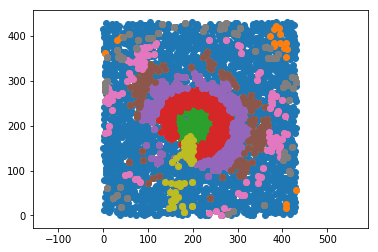

In [108]:
plt.scatter(x,y)
plt.scatter(x_Lo,y_Lo)

for r in range(nb_r):
    plt.scatter(x_pie_r_Lo[r], y_pie_r_Lo[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=8;    
plt.scatter(x_pie_theta_Lo[t], y_pie_theta_Lo[t])    
plt.axis('equal')

In [109]:
pie = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [110]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r[r])):
                if (pie_r[r][l] in pie_theta[t]):
                    pie[r][t].append(pie_r[r][l])
    

In [111]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie[r][t])) )

r=0 t=0 9
r=0 t=1 9
r=0 t=2 8
r=0 t=3 7
r=0 t=4 8
r=0 t=5 7
r=0 t=6 6
r=0 t=7 10
r=0 t=8 6
r=0 t=9 9
r=0 t=10 9
r=0 t=11 6
r=1 t=0 21
r=1 t=1 27
r=1 t=2 22
r=1 t=3 24
r=1 t=4 23
r=1 t=5 24
r=1 t=6 18
r=1 t=7 16
r=1 t=8 24
r=1 t=9 21
r=1 t=10 23
r=1 t=11 25
r=2 t=0 38
r=2 t=1 33
r=2 t=2 33
r=2 t=3 32
r=2 t=4 35
r=2 t=5 31
r=2 t=6 30
r=2 t=7 30
r=2 t=8 32
r=2 t=9 39
r=2 t=10 37
r=2 t=11 34
r=3 t=0 50
r=3 t=1 47
r=3 t=2 48
r=3 t=3 44
r=3 t=4 49
r=3 t=5 41
r=3 t=6 44
r=3 t=7 43
r=3 t=8 42
r=3 t=9 37
r=3 t=10 48
r=3 t=11 48
r=4 t=0 57
r=4 t=1 57
r=4 t=2 54
r=4 t=3 54
r=4 t=4 55
r=4 t=5 53
r=4 t=6 51
r=4 t=7 55
r=4 t=8 54
r=4 t=9 50
r=4 t=10 57
r=4 t=11 58
r=5 t=0 48
r=5 t=1 66
r=5 t=2 49
r=5 t=3 45
r=5 t=4 63
r=5 t=5 6
r=5 t=6 8
r=5 t=7 55
r=5 t=8 6
r=5 t=9 6
r=5 t=10 56
r=5 t=11 46


In [112]:
pie_Lo = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [113]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r_Lo[r])):
                if (pie_r_Lo[r][l] in pie_theta_Lo[t]):
                    pie_Lo[r][t].append(pie_r_Lo[r][l])
    

In [114]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie_Lo[r][t])) )

r=0 t=0 9
r=0 t=1 8
r=0 t=2 8
r=0 t=3 7
r=0 t=4 6
r=0 t=5 7
r=0 t=6 6
r=0 t=7 10
r=0 t=8 6
r=0 t=9 9
r=0 t=10 8
r=0 t=11 6
r=1 t=0 21
r=1 t=1 27
r=1 t=2 21
r=1 t=3 22
r=1 t=4 23
r=1 t=5 22
r=1 t=6 9
r=1 t=7 4
r=1 t=8 18
r=1 t=9 21
r=1 t=10 23
r=1 t=11 25
r=2 t=0 28
r=2 t=1 26
r=2 t=2 13
r=2 t=3 11
r=2 t=4 30
r=2 t=5 24
r=2 t=6 3
r=2 t=7 7
r=2 t=8 4
r=2 t=9 13
r=2 t=10 35
r=2 t=11 33
r=3 t=0 23
r=3 t=1 7
r=3 t=2 9
r=3 t=3 3
r=3 t=4 32
r=3 t=5 11
r=3 t=6 2
r=3 t=7 4
r=3 t=8 11
r=3 t=9 2
r=3 t=10 17
r=3 t=11 27
r=4 t=0 11
r=4 t=1 5
r=4 t=2 3
r=4 t=3 4
r=4 t=4 23
r=4 t=5 11
r=4 t=6 3
r=4 t=7 5
r=4 t=8 8
r=4 t=9 5
r=4 t=10 8
r=4 t=11 19
r=5 t=0 8
r=5 t=1 7
r=5 t=2 9
r=5 t=3 6
r=5 t=4 11
r=5 t=5 4
r=5 t=6 0
r=5 t=7 6
r=5 t=8 0
r=5 t=9 2
r=5 t=10 1
r=5 t=11 7


In [115]:
threshold = 0.6
M_pie_bin = np.zeros((nb_r, nb_theta))

for r in range(nb_r):
    for t in range(nb_theta):
        if(len(pie_Lo[r][t])/len(pie[r][t])>=threshold):
            M_pie_bin[r,t]=1

In [117]:
print(M_pie_bin)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [125]:
boundary = [[],[]]

for t in range(nb_theta):
    print(t)
    boundary[0].append(t)
    
    b_found = 0
    for r in range(0,nb_r-2,1):
        
        if M_pie_bin[r,t]==1 and (M_pie_bin[r+1,t]==0 or r+1>=nb_r) and (M_pie_bin[r+2,t]==0 or r+2>=nb_r):
            b_found = 1
            print('ok')
            boundary[1].append(r)
    print('b_found = %d' % b_found)
    if b_found == 0:
        if M_pie_bin[nb_r-2,t]==1 and M_pie_bin[nb_r-1,t]!=1:
            boundary[1].append(nb_r-2)
        elif M_pie_bin[nb_r-1,t]==1:
            boundary[1].append(nb_r-1)
                
theta_l = np.array(boundary[0])
r_theta = np.array(boundary[1])
print(theta_l)
print(r_theta)

0
ok
b_found = 1
1
ok
b_found = 1
2
ok
b_found = 1
3
ok
b_found = 1
4
ok
b_found = 1
5
ok
b_found = 1
6
ok
b_found = 1
7
ok
b_found = 1
8
ok
b_found = 1
9
ok
b_found = 1
10
ok
b_found = 1
11
ok
b_found = 1
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[2 2 1 1 3 2 0 0 1 1 2 2]


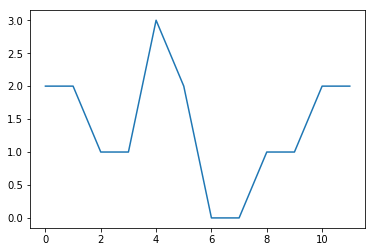

In [126]:
plt.plot(theta_l,r_theta)

In [127]:
r_q = np.fft.rfft(r_theta)
for i in range((len(r_q))):
    print(r_q[i])

(17+0j)
(3.2320508075688785-1.8660254037844417j)
(-0.5000000000000021+4.3301270189221945j)
(3-2j)
(-2.5-0.8660254037844375j)
(-0.23205080756887653-0.13397459621556185j)
(1+0j)


In [128]:
r_q_pow = abs(r_q)**2
print(r_q_pow)

[2.89000000e+02 1.39282032e+01 1.90000000e+01 1.30000000e+01
 7.00000000e+00 7.17967697e-02 1.00000000e+00]


[0. 1. 2. 3. 4. 5. 6.]


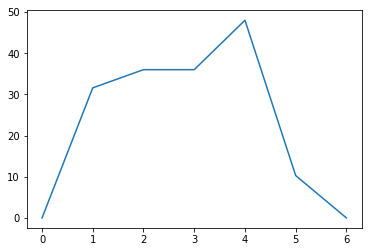

In [541]:
q = np.arange(nb_theta/2+1)
print(q)
plt.plot(r_q_pow*q**2)